<a href="https://colab.research.google.com/github/Yapping72/ICT3102-e-mc2-assignment-1/blob/main/Copy_of_ICT3102_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Abstract**

This report presents a focused study on response times in tokenization and detokenization techniques across language models. Our project begins with research into tokenization methods, including Byte-Pair Encoding (BPE), WordPiece, and SentencePiece, emphasizing their significance in natural language processing. We select language models from the Hugging Face libraries that employ these techniques and measure response times using Python.

We analysed batched and unbatched data processing and evaluated the nuances between them. We carefully choosed the corpora, considering size and efficiency, from Hugging Face's dataset repository. A flexible framework is established to assess timing disparities among various language models.

To enhance the comparison, we introduce the Spacy library as an external model. Language models for English, Chinese, and Spanish are chosen, and their run times are analyzed through associated language models. The analysis phase focuses on discerning efficiency, considering factors like tokenization, detokenization, and data batching.

Our findings are presented visually, offering insights into response time disparities among different model tokenization methods and data processing approaches. This project aims to provide practical insights into language processing efficiency and inform model selection for different languages.

### **Project Methodology**

For the purpose of this assignment, our central objective is to conduct a thorough examination of response time variations associated with diverse tokenization and detokenization techniques implemented across various language models. Our approach is multifaceted, encompassing comparisons of tokenization techniques, the utilization of both batched and unbatched data, and evaluations across distinct corpora. Additionally, we broaden our scope beyond the Hugging Face libraries by incorporating an external library called Spacy into our research. It is important to recognize that tokenization holds an important part in natural language processing, enabling the efficient manipulation of textual data.

The initial phase of our project involves an extensive exploration of various tokenization types, such as Byte-Pair Encoding (BPE), WordPiece, and SentencePiece, coupled with a comprehensive understanding of the underlying necessity of tokenization. Subsequently, we narrow our focus to language models employing these distinct tokenization methods, all of which are readily accessible within the Hugging Face libraries. To ensure precision in recording response times, we utilized Python's time module to measure the execution durations of both tokenization and detokenization processes.

In addition, we introduced an external library, Spacy, into our research. This additional tool permits an exploration of alternative approaches to tokenization and detokenization, facilitating a side-by-side evaluation of Spacy's performance alongside the models we have chosen from the Hugging Face libraries.

Furthermore, we delve into the complexities of batched and unbatched data. Batched data refers to the grouping of text for simultaneous processing, while unbatched data is processed individually. We carefully explored the nuances between these two data types, analyzing the time differentials for the tokenization and detokenization of each token.

To ensure meaningful experimentation and to account for potential variability, we ran our code for each model and technique a total of 10 times. This iterative approach allowed us to obtain consistent measurements and ensure the reliability of our results.

To ensure fairness and accuracy in our testing, we adhered to strict guidelines to ensure consistency. Each language model underwent an identical process, encompassing both batched and unbatched data, for both tokenization and detokenization. This approach guaranteed a consistent and precise measurement of processes and timings across all models.

In the analysis phase, we meticulously studied the timing data collected throughout our research to achieve a comprehensive understanding of response times linked to various tokenization and detokenization techniques. Our objective is to identify factors influencing processing times, determine the most efficient tokenization method, and ascertain whether batched or unbatched data processing yields better outcomes.

Furthermore, we employed data visualization techniques to effectively present our findings. Through the creation of informative charts and graphs, we were able to study and analyze disparities in response times between different tokenization methods and data processing approaches. These visual aids helped us in our research and revealed key insights.

The analysis we conducted aims to shed light on the nuances of response times in tokenization and detokenization, providing valuable insights for the field of natural language processing.

# `Project Dependencies`

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
!python -m spacy download zh_core_web_sm
!python -m spacy download es_core_news_sm
!pip install transformers
!pip install sentencepiece
!pip install datasets
!pip install gdown


2023-10-05 16:39:33.246659: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 16:39:35.131161: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2023-10-05 16:39:49.171944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 16:39:50.833494: W tensorflow/compiler/tf2tensorrt/utils/py

In [ ]:
!git clone https://github.com/Yapping72/ICT3102-e-mc2-assignment-1.git

/content/test/test
Cloning into 'ICT3102-e-mc2-assignment-1'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 64 (delta 28), reused 38 (delta 12), pack-reused 0
Receiving objects: 100% (64/64), 3.78 MiB | 8.89 MiB/s, done.
Resolving deltas: 100% (28/28), done.


# `Project Code`

Updated Project Code With detokenisation

In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset
import time
import os

dataset = load_dataset("HuggingFaceH4/self-instruct-seed")
corpus = dataset['train']['instruction']
dataset2 = load_dataset("fka/awesome-chatgpt-prompts")
corpus2 = dataset2['train']['prompt']


def save_corpus_as_text_file(corpus, output_path: str):
  with open(output_path, "w", encoding="utf-8") as file:
    for line in corpus:
      line = line.replace("\n", " ")
      file.write(line + "\n")


base_path = os.path.join("ICT3102-e-mc2-assignment-1", "Datasets") # Replace with where your translated corpora exists.
original_corpus_1 = os.path.join(base_path, "original_corpus_1.txt")
original_corpus_2 = os.path.join(base_path, "original_corpus_2.txt")

save_corpus_as_text_file(corpus, original_corpus_1)
save_corpus_as_text_file(corpus2, original_corpus_2)

def initialize_model(model_name: str):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    return tokenizer

#Unbatched data
def time_model(tokenizer_object, text, tokenize=True):
    if tokenize:
        # Capture the start time
        start_time = time.time()
        tokenizer_object.encode_plus(text)
    else:
        tokens = tokenizer_object.encode_plus(text)
        # Capture the start time
        start_time = time.time()
        tokenizer_object.decode(tokens['input_ids'], skip_special_tokens=True)

    # Capture the end time
    end_time = time.time()
    # Calculate the elapsed time in milliseconds
    elapsed_time = (end_time - start_time) * 1e3
    return elapsed_time

def analyse_encode_plus(tokenizers: list, corpus: list, num_runs: int) -> dict:
    results = {}
    results['method'] = "Unbatched"

    for hugging_face_tokenizer in tokenizers:
        try:
            tokenizer = initialize_model(hugging_face_tokenizer)
            total_time_tokenization = 0  # Total time for tokenization
            total_time_detokenization = 0  # Total time for detokenization

            for _ in range(num_runs):
                for text in corpus:
                    # Tokenize each line in the corpus individually
                    tokenization_time = time_model(tokenizer, text, tokenize=True)
                    total_time_tokenization += tokenization_time

                    # Detokenize the encoded text
                    detokenization_time = time_model(tokenizer, text, tokenize=False)
                    total_time_detokenization += detokenization_time

            # Calculate the average time for tokenization and detokenization
            avg_tokenization_time = total_time_tokenization / num_runs
            avg_detokenization_time = total_time_detokenization / num_runs

            # Extract tokenizer name or path for dictionary key
            tokenizer_name = tokenizer.name_or_path
            results[tokenizer_name] = {
                "Tokenization": avg_tokenization_time,
                "Detokenization": avg_detokenization_time
            }

            print(f"{tokenizer_name}:")
            print(f"Average Tokenization Time: {avg_tokenization_time} ms")
            print(f"Average Detokenization Time: {avg_detokenization_time} ms")
        except Exception as e:
            print(f"Error occurred for {hugging_face_tokenizer}: {e}")
            continue

    return results


def time_model_batch(tokenizer, corpus,tokenize=True):

    if tokenize:
        # Capture the start time
        start_time = time.time()
        tokenizer.batch_encode_plus(corpus)
    else:
        tokens = tokenizer.batch_encode_plus(corpus)
        # Capture the start time
        start_time = time.time()
        tokenizer.batch_decode(tokens['input_ids'], skip_special_tokens=True)

    # Capture the end time
    end_time = time.time()
    # Calculate the elapsed time in milliseconds
    elapsed_time = (end_time - start_time) * 1e3
    return elapsed_time

def analyse_batch(tokenizers: list, corpus: list, num_runs: int) -> dict:
    results = {}
    results['method'] = "Batched"

    for hugging_face_tokenizer in tokenizers:
        tokenizer = initialize_model(hugging_face_tokenizer)
        try:
            tokenization_times = []
            detokenization_times = []

            for _ in range(num_runs):
                # Get time for tokenization
                tokenization_time = time_model_batch(tokenizer, corpus, tokenize=True)
                tokenization_times.append(tokenization_time)

                # Get time for detokenization
                detokenization_time = time_model_batch(tokenizer, corpus, tokenize=False)
                detokenization_times.append(detokenization_time)

            # Extract tokenizer name or path for dictionary key
            tokenizer_name = tokenizer.name_or_path
            results[tokenizer_name] = {
                "Tokenization": sum(tokenization_times) / num_runs,
                "Detokenization": sum(detokenization_times) / num_runs
            }

            print(f"{tokenizer_name}:")
            print(f"Average Tokenization Time: {sum(tokenization_times) / num_runs} ms")
            print(f"Average Detokenization Time: {sum(detokenization_times) / num_runs} ms")
        except Exception as e:
            print(f"Error occurred for {hugging_face_tokenizer}: {e}")
            continue

    return results


## Openai , Gpt2 , Llama Analysis for Unbatched and Batched data

In [ ]:
byte_pair = ["openai-gpt", "gpt2", "NousResearch/Llama-2-13b-hf"]
print("--------------------------Unbatched Data-------------------------------")
byte_pair_timing_unbatched = analyse_encode_plus(byte_pair, corpus,10)
print("--------------------------Batched Data-------------------------------")
byte_pair_timing_batched = analyse_batch(byte_pair,corpus,10)

--------------------------Unbatched Data-------------------------------


openai-gpt:
Average Tokenization Time: 64.59822654724121 ms
Average Detokenization Time: 1306.7325830459595 ms


gpt2:
Average Tokenization Time: 43.50428581237793 ms
Average Detokenization Time: 61.037302017211914 ms


NousResearch/Llama-2-13b-hf:
Average Tokenization Time: 14.987850189208984 ms
Average Detokenization Time: 28.032946586608887 ms
--------------------------Batched Data-------------------------------
openai-gpt:
Average Tokenization Time: 11.788034439086914 ms
Average Detokenization Time: 26.524782180786133 ms
gpt2:
Average Tokenization Time: 18.2891845703125 ms
Average Detokenization Time: 43.33786964416504 ms
NousResearch/Llama-2-13b-hf:
Average Tokenization Time: 12.381339073181152 ms
Average Detokenization Time: 48.55194091796875 ms


## Distilbert-base-uncased , mobilebert-uncased , Funnel Transformers, Mpnet Analysis for Unbatched and Batched Data

In [ ]:
# Get response time for word_piece models
word_piece =['distilbert-base-uncased','google/mobilebert-uncased','funnel-transformer/small-base','sentence-transformers/all-mpnet-base-v2']
print("--------------------------Unbatched Data-------------------------------")
word_piece_timing_unbatched = analyse_encode_plus(word_piece, corpus,10)
print("--------------------------Batched Data-------------------------------")
word_piece_timing_batched = analyse_batch(word_piece,corpus,10)

--------------------------Unbatched Data-------------------------------


distilbert-base-uncased:
Average Tokenization Time: 21.658754348754883 ms
Average Detokenization Time: 31.4422607421875 ms


google/mobilebert-uncased:
Average Tokenization Time: 23.17347526550293 ms
Average Detokenization Time: 31.58712387084961 ms


funnel-transformer/small-base:
Average Tokenization Time: 22.509431838989258 ms
Average Detokenization Time: 31.72755241394043 ms


sentence-transformers/all-mpnet-base-v2:
Average Tokenization Time: 22.911953926086426 ms
Average Detokenization Time: 32.11958408355713 ms
--------------------------Batched Data-------------------------------
distilbert-base-uncased:
Average Tokenization Time: 13.030266761779785 ms
Average Detokenization Time: 28.07018756866455 ms
google/mobilebert-uncased:
Average Tokenization Time: 12.174534797668457 ms
Average Detokenization Time: 29.087519645690918 ms
funnel-transformer/small-base:
Average Tokenization Time: 12.398481369018555 ms
Average Detokenization Time: 30.40778636932373 ms
sentence-transformers/all-mpnet-base-v2:
Average Tokenization Time: 18.83101463317871 ms
Average Detokenization Time: 52.193450927734375 ms


## T5 Unbatched and Batch data analysis

In [ ]:
sentence_piece = ["google/flan-t5-base","google/bigbird-roberta-base","albert-base-v2" , "xlnet-base-cased"]
sentence_piece_timing_unbatched = analyse_encode_plus(sentence_piece, corpus,10)
sentence_piece_timing_batched = analyse_batch(sentence_piece,corpus,10)

google/flan-t5-base:
Average Tokenization Time: 29.844093322753906 ms
Average Detokenization Time: 41.51713848114014 ms


google/bigbird-roberta-base:
Average Tokenization Time: 19.283509254455566 ms
Average Detokenization Time: 26.744794845581055 ms


albert-base-v2:
Average Tokenization Time: 24.60348606109619 ms
Average Detokenization Time: 28.119874000549316 ms


xlnet-base-cased:
Average Tokenization Time: 23.46053123474121 ms
Average Detokenization Time: 27.520060539245605 ms
google/flan-t5-base:
Average Tokenization Time: 10.276341438293457 ms
Average Detokenization Time: 24.908089637756348 ms
google/bigbird-roberta-base:
Average Tokenization Time: 9.267807006835938 ms
Average Detokenization Time: 24.785208702087402 ms
albert-base-v2:
Average Tokenization Time: 24.160099029541016 ms
Average Detokenization Time: 50.501394271850586 ms
xlnet-base-cased:
Average Tokenization Time: 19.819045066833496 ms
Average Detokenization Time: 45.195555686950684 ms


## Graph Analysis for Byte-Pair Encoding , WordPiece ,Unigram and Sentence Piece Unbatched and Batched Data

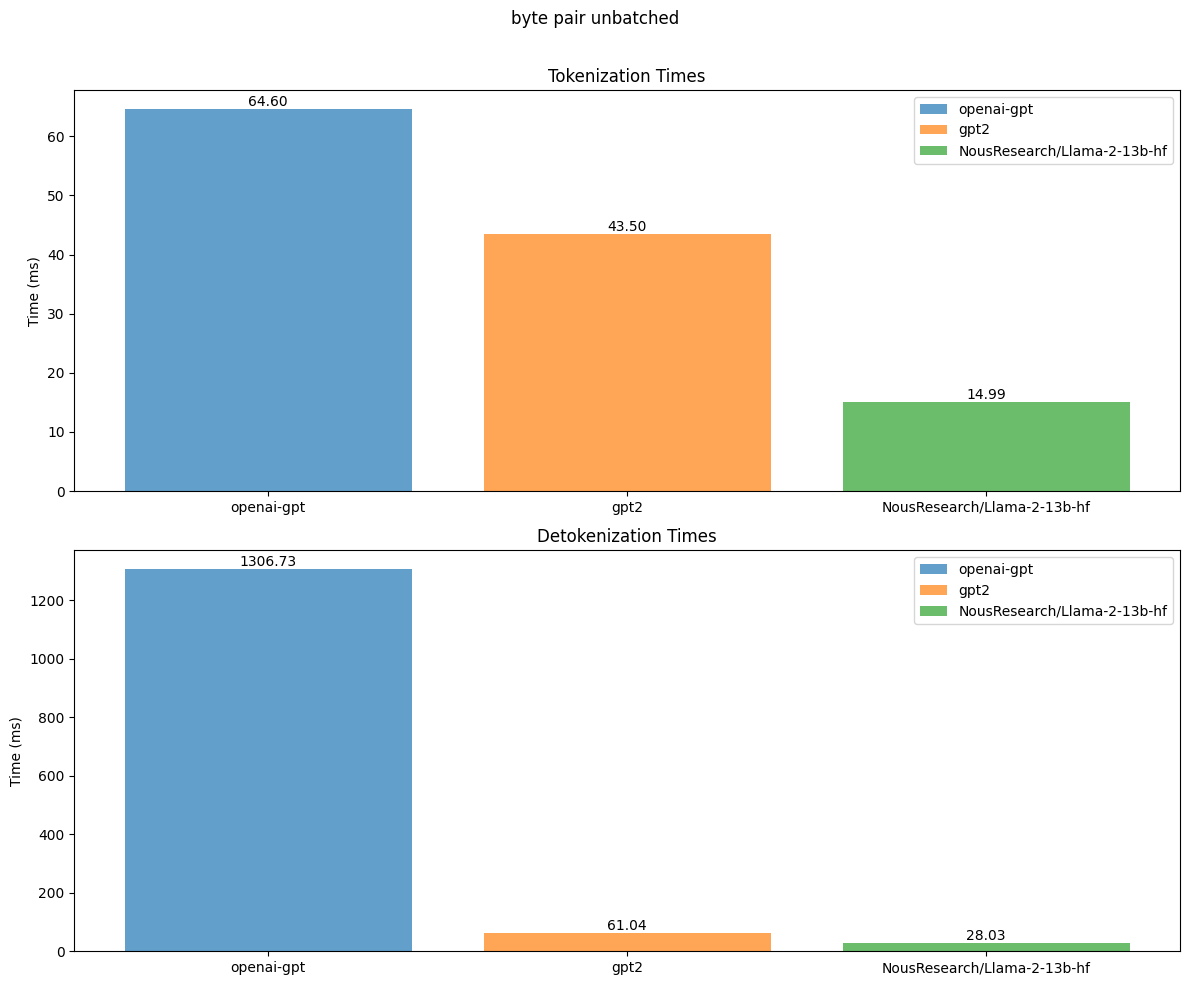

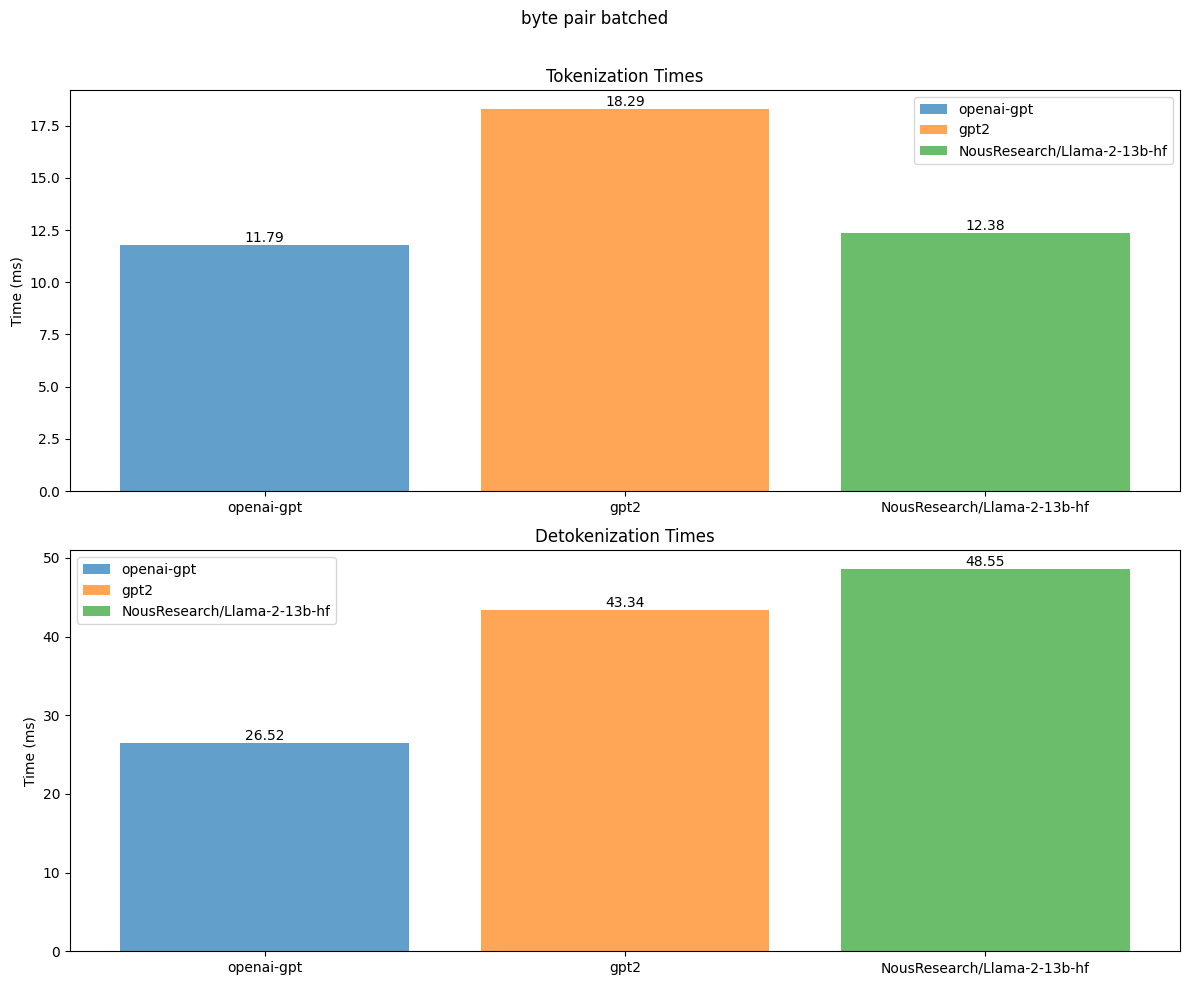

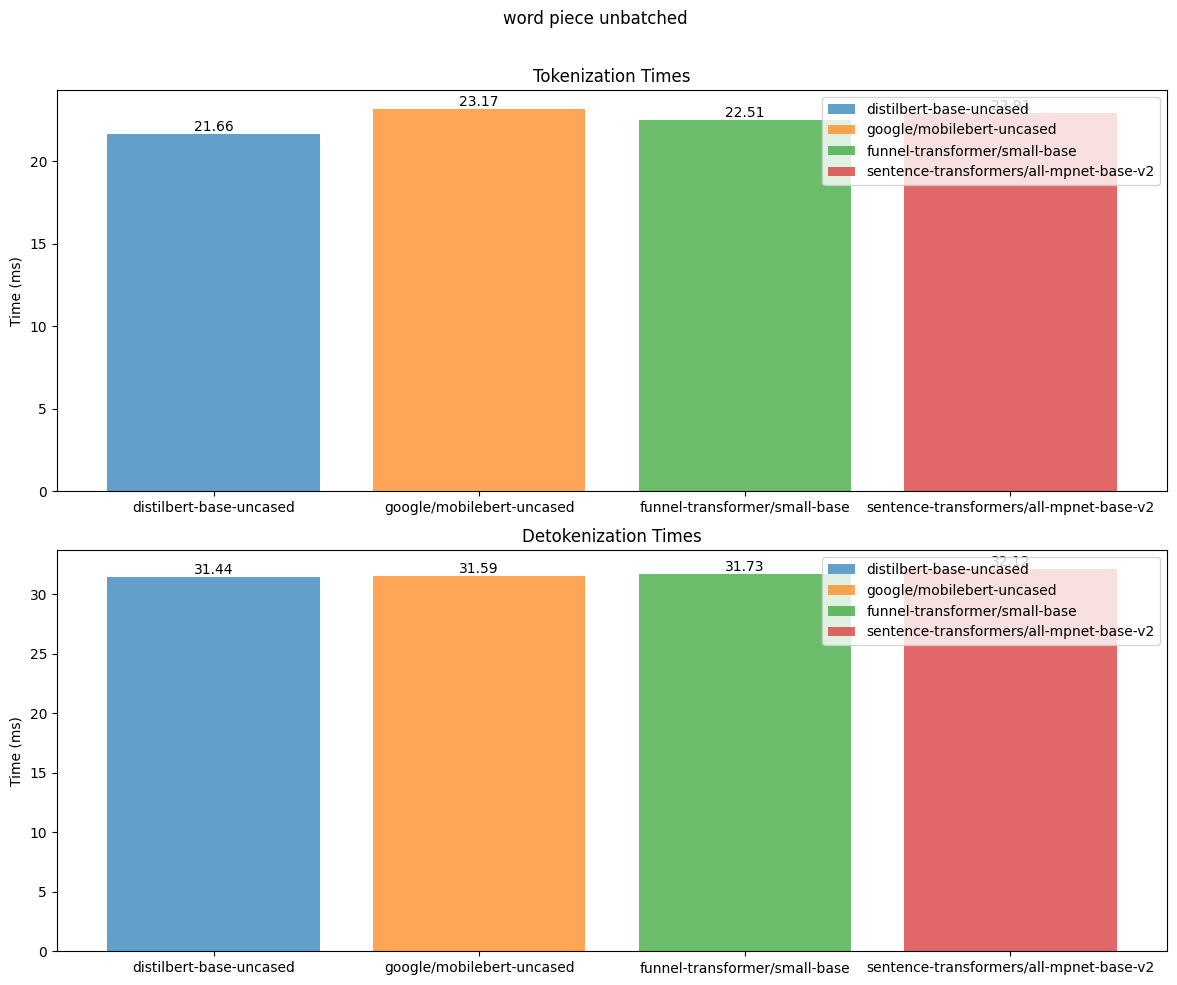

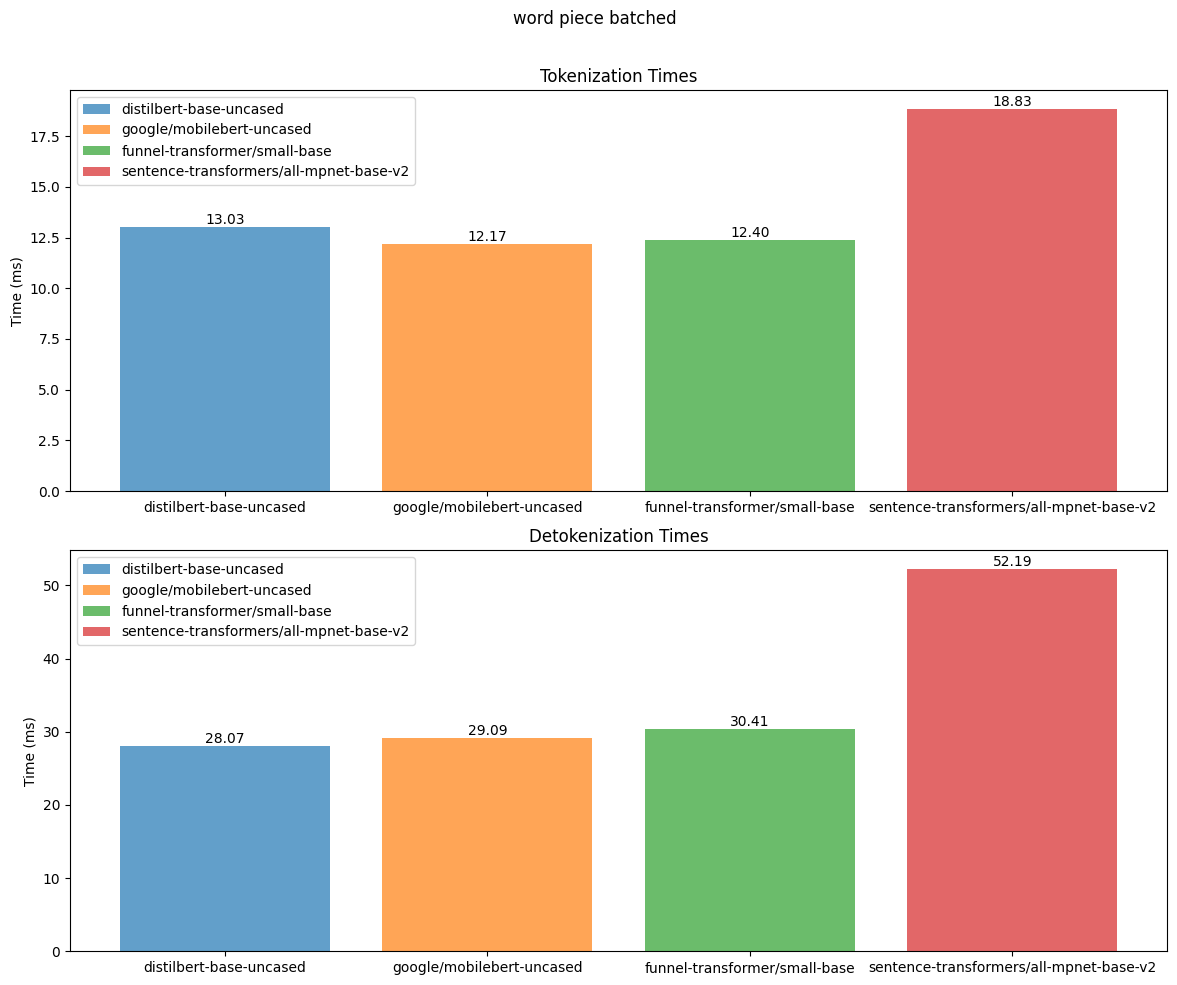

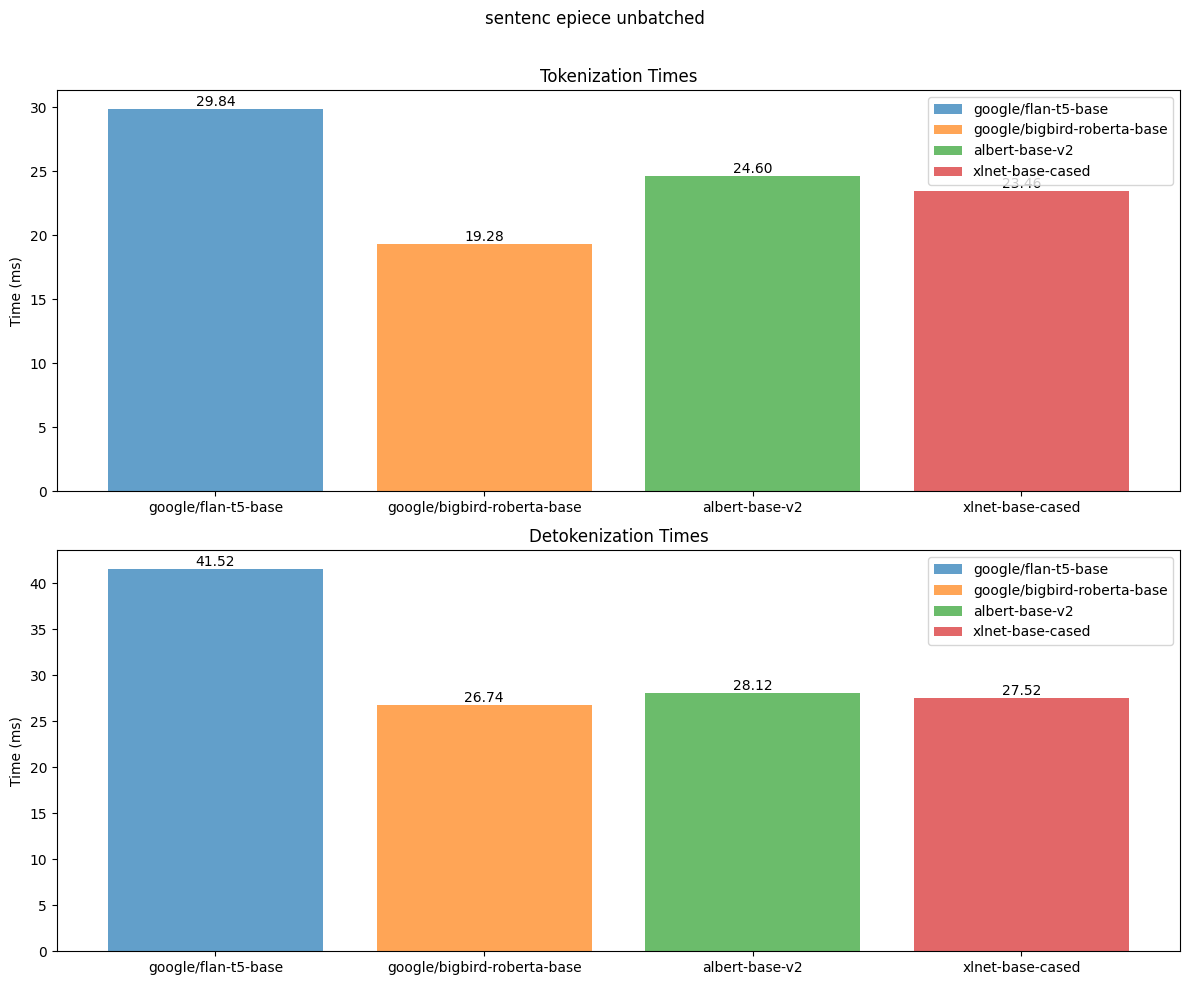

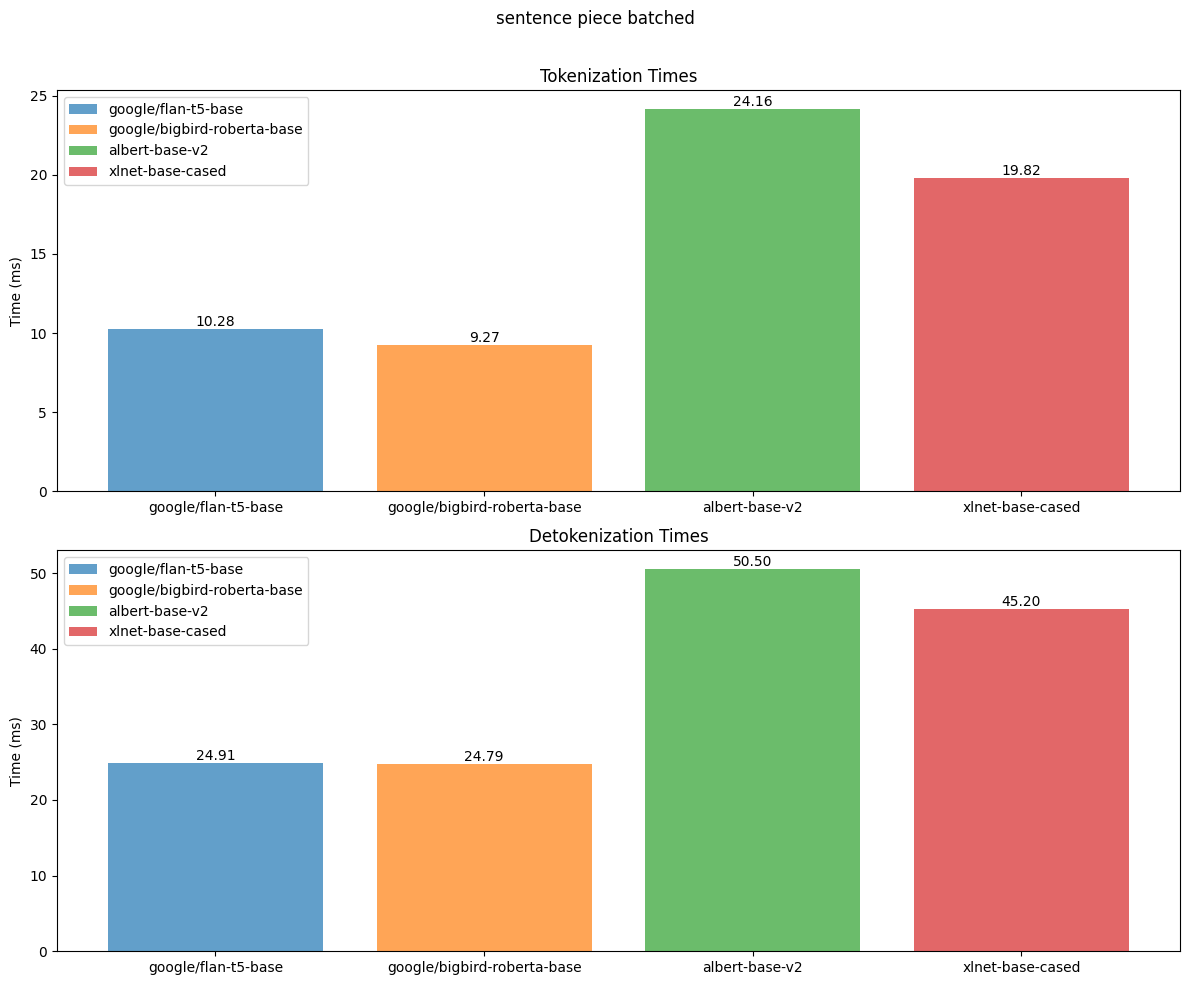

In [ ]:
import matplotlib.pyplot as plt

def plot_dict(data_dict, title=''):
    # Extract method names and labels for the x-axis
    methods = list(data_dict.keys())
    x_labels = [f"{method}" for method in methods]

    # Create subplots for tokenization and detokenization times
    fig, axs = plt.subplots(2, figsize=(12, 10))
    fig.suptitle(title)

    for key, value in data_dict.items():
        if key == "method":
            continue

        # Plot tokenization times
        tokenization_time = value.get('Tokenization', 0.0)
        axs[0].bar(key, tokenization_time, label=key, alpha=0.7)

        # Plot detokenization times
        detokenization_time = value.get('Detokenization', 0.0)
        axs[1].bar(key, detokenization_time, label=key, alpha=0.7)

        # Add text labels on top of the bars
        axs[0].annotate(f'{tokenization_time:.2f}', (key, tokenization_time),
                            ha='center', va='bottom')
        axs[1].annotate(f'{detokenization_time:.2f}', (key, detokenization_time),
                            ha='center', va='bottom')

    # Set labels and titles
    axs[0].set_ylabel('Time (ms)')
    axs[0].set_title('Tokenization Times')
    axs[0].legend()

    axs[1].set_ylabel('Time (ms)')
    axs[1].set_title('Detokenization Times')
    axs[1].legend()

    # Show the plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    print("\n\n\n\n")

plot_dict(byte_pair_timing_unbatched, "byte pair unbatched")
plot_dict(byte_pair_timing_batched, "byte pair batched")
plot_dict(word_piece_timing_unbatched, "word piece unbatched")
plot_dict(word_piece_timing_batched, "word piece batched")
plot_dict(sentence_piece_timing_unbatched, "sentenc epiece unbatched")
plot_dict(sentence_piece_timing_batched, "sentence piece batched")

##Translation of corpus

In [ ]:
from transformers import M2M100ForConditionalGeneration, AutoTokenizer

def translate(corpus,language):
    # Load the pre-trained model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained("facebook/m2m100_418M", src_lang="en")
    model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")

    # Initialize an empty list to store the translated sentences
    translated_corpus = []

    # Loop through each sentence in the input corpus
    for sentence in corpus:
        # Tokenize and encode the English sentence
        encoded_en = tokenizer(sentence, return_tensors="pt")

        # Generate the translation to Chinese
        generated_tokens = model.generate(**encoded_en, forced_bos_token_id=tokenizer.get_lang_id(language))

        # Decode the generated tokens back to text
        translated_sentence = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

        #Print translated_sentence
        print(translated_sentence)

        # Append the translated sentence to the result list
        translated_corpus.append(translated_sentence)

    return translated_corpus

In [ ]:
chinese_corpus = translate(corpus2,"zh")
# Save the translations to a text file
with open("corpus_2_chinese.txt", "w", encoding="utf-8") as file:
    for translation in chinese_corpus:
        file.write(translation + "\n")

print("Translations saved to 'corpus_2_chinese.txt'.")

# Additional Analysis - Translation Accuracy Analysis

## Overview

We investigated the accuracy of translations using the `facebook/m2m100_418M` multilingual model. We evaluate the quality of translations from English to Chinese and Spanish, followed by a retranslation of the generated Chinese and Spanish corpora back to English. The accuracy of these retranslations is determined using the Bilingual Evaluation Understudy (BLEU) Score, a common metric for assessing machine translation quality.

## Workflow

### 1. Translation to Chinese and Spanish
   - We leverage the `facebook/m2m100_418M` model to translate an English corpus into both Chinese and Spanish. This step results in translated corpora in these target languages.

### 2. Retranslation to English
   - The translated Chinese and Spanish corpora are then retranslated back into English using the same `facebook/m2m100_418M` model. This process generates retranslated English corpora, which should ideally match the original English text.

### 3. Accuracy Assessment with BLEU Score
   - To evaluate the accuracy of the retranslated English corpora, we employ the BLEU Score. BLEU measures the similarity between the retranslated English text and the original English text. A higher BLEU Score indicates a higher degree of accuracy in translation.

## What is BLEU Score?

The Bilingual Evaluation Understudy (BLEU) Score is a widely used metric for assessing the quality of machine-generated translations. It quantitatively measures how closely a machine-generated translation matches one or more human reference translations. BLEU evaluates translation accuracy by considering factors such as precision, recall, and the brevity penalty.

In the context of this project, the BLEU Score will be used to gauge how well the `facebook/m2m100_418M` model performs translation between English, Chinese, and Spanish. It will help us understand the accuracy of the model's translations and whether they preserve the original meaning effectively.

By following this workflow and using the BLEU Score as a metric, we aim to gain insights into the translation capabilities of the model and identify areas for potential improvement.

## Results


In [ ]:
import os

def text_to_corpus_list(path:str) -> list:
    """Converts a corpus in .txt format to a list of lines"""
    with open(path, "r", encoding="utf-8") as file:
        corpus = []
        for line in file.readlines():
            corpus.append(line.strip())  # Remove newline characters if needed
        return corpus  # Return the list of lines

def retranslate_to_eng(translated_corpus, lang_code:str, output_path:str):
    """Retranslates a corpus to english."""
    retranslated_corpus = translate(translated_corpus, "en")
    with open(output_path, "w", encoding="utf-8") as file:
        for line in retranslated_corpus:
          file.write(line + "\n")

# Initialize file paths
base_path = os.path.join("ICT3102-e-mc2-assignment-1", "Datasets") # Replace with where your translated corpora exists.
chinese_corpus1_path = os.path.join(base_path, "corpus_1_chinese.txt")
epsanol_corpus1_path = os.path.join(base_path, "corpus_1_espanol.txt")

chinese_corpus2_path = os.path.join(base_path, "corpus_2_chinese.txt")
epsanol_corpus2_path = os.path.join(base_path, "corpus_2_espanol.txt")

output_path = os.path.join(base_path, "retranslated_corpus_2_espanol.txt") # CHANGE THIS
corpus_to_retranslate = text_to_corpus_list(epsanol_corpus2_path) # CHANGE THIS
retranslate_to_eng(corpus_to_retranslate, "en", output_path)

Is there something that I can eat for a breakfast that does not include eggs, but includes proteins, and has approximately 700-1000 calories?
What is the relationship between the couples?
Generate a description of a sense for each one of the following people.
Describe a situation in which the estereotipo dado can hurt.
Generate a subjective title adequado para el siguiente correo electrónico:
How do you answer this question in an interview?
Brainstorm is a list of possible resolutions of the new year.
Explícanme el siguiente idioma y tratan de darme some examples.
Generate a haiku using the following word:
I recommend a film to see during the end of the week and explain the reason.
They suggest some games that can be jugados by a group of people.
Make a list of foods for a healthy food.
Explain the human behavior.
Exporta las dependencias en líneas, con cada línea formatada como (la palabra actual -> su palabra principal).
Usando los hechos que se dan, escriba una pareja de preguntas-r

In [ ]:
!pip install sacrebleu
import spacy
from sklearn.metrics.pairwise import cosine_similarity

ERROR: Operation cancelled by user


'/content'

In [ ]:
import sacrebleu

# Dictionary to store BLEU Score categories and their counts
similarity = {
    "High Similarity": 0,        # Cosine Similarity >= 0.8
    "Moderate Similarity": 0,    # 0.6 <= Cosine Similarity < 0.8
    "Low Similarity": 0,         # 0.4 <= Cosine Similarity < 0.6
    "Very Low Similarity": 0     # Cosine Similarity < 0.4
}

def update_similarity_dictionary(similarity: dict, cosine_similarity_score: float) -> dict:
    """Populates the similarity quality dictionary"""
    # Categorize based on cosine similarity score ranges
    if cosine_similarity_score >= 0.8:
        similarity["High Similarity"] += 1  # High similarity category (score >= 0.8)
    elif cosine_similarity_score >= 0.6:
        similarity["Moderate Similarity"] += 1  # Moderate similarity category (0.6 <= score < 0.8)
    elif cosine_similarity_score >= 0.4:
        similarity["Low Similarity"] += 1  # Low similarity category (0.4 <= score < 0.6)
    else:
        similarity["Very Low Similarity"] += 1  # Very low similarity category (score < 0.4)

# Calculate cosine similarity
def calculate_cosine_similarity(original, translated) -> float:
    # Convert tokens to lowercase for consistent comparison
    tokens1 = [token.text for token in nlp(original) if not token.is_stop]
    tokens2 = [token.text for token in nlp(translated) if not token.is_stop]

    tokens1 = [token.lower() for token in tokens1]
    tokens2 = [token.lower() for token in tokens2]

    # Combine tokens into one list for vectorization
    combined_tokens = tokens1 + tokens2

    # Create vectors for each sentence
    vector1 = [1 if token in tokens1 else 0 for token in combined_tokens]
    vector2 = [1 if token in tokens2 else 0 for token in combined_tokens]

    # Calculate cosine similarity
    similarity_score = cosine_similarity([vector1], [vector2])[0][0]
    return similarity_score


original_corpus_1_path = os.path.join(base_path, "original_corpus_1.txt") # modify this accordingly
translated_corpus_path = os.path.join(base_path, "retranslated_corpus_1_espanol.txt")

original_corpus_1 = text_to_corpus_list(original_corpus_1_path) # retrieve the original corpus as a list of lines
retranslated_corpus = text_to_corpus_list(translated_corpus_path) # retrieve the translated corpus as a list of lines

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

while (1):
  if len(original_corpus_1) == 0 or len(retranslated_corpus) == 0:
    break

  original = original_corpus_1.pop()
  retranslated = retranslated_corpus.pop()

  # Compare the original text, updat the transaction_quality dictionary using the bleu score
  similarity_score = calculate_cosine_similarity(original, retranslated)
  update_similarity_dictionary(similarity, similarity_score)

print(similarity)

{'High Similarity': 64, 'Moderate Similarity': 34, 'Low Similarity': 37, 'Very Low Similarity': 40}


##Other languages

In [ ]:
def read_from_file(name):
  # Open the file for reading
  with open(name, 'r') as file:
      # Read all lines from the file and store them in a list
      lines = [line.strip() for line in file]
      return lines

!gdown 1PflB7C7BHccK47KKRUbRW1wR4OSMUxXO #downloading corpus_1_chinese.txt
!gdown 1cH4k1NSNnSImSJMqV7WUeINW-BIv8Sl_ #downloading corpus_1_espanol.txt
!gdown 1A4JOVzqk8houWPbMp6YbRm1dsSlYyLVM #downloading corpus_2_chinese.txt
!gdown 1z6sSljlNvOmvcYVK9lYg9OcyAvjkVvRp #downloading corpus_2_espanol.txt
zh1_array = read_from_file("corpus_1_chinese.txt")
zh2_array = read_from_file("corpus_2_chinese.txt")
es1_array = read_from_file("corpus_1_espanol.txt")
es2_array = read_from_file("corpus_2_espanol.txt")

chinese_models = ["bert-base-chinese", "bert-base-multilingual-cased", "OpenBuddy/openbuddy-llama2-70b-v10.1-bf16", "distilbert-base-multilingual-cased", "xlm-roberta-base"]
spanish_models = ["bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"]
english_models = ["bert-base-multilingual-cased", "OpenBuddy/openbuddy-llama2-70b-v10.1-bf16", "distilbert-base-multilingual-cased", "xlm-roberta-base","bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"]

## English Tokenization and Detokenization

In [ ]:
print("--------------------------Unbatched English Corpus 1 Data-------------------------------")
english_corpus1_timing_unbatched = analyse_encode_plus(english_models, corpus, 10)
print("--------------------------Batched English Corpus 1 Data-------------------------------")
english_corpus1_timing_batched = analyse_batch(english_models,corpus, 10)
print("--------------------------Unbatched English Corpus 2 Data-------------------------------")
english_corpus2_timing_unbatched = analyse_encode_plus(english_models, corpus2,10)
print("--------------------------Batched English Corpus 2 Data-------------------------------")
english_corpus2_timing_batched = analyse_batch(english_models,corpus2,10)

##Chinese Tokenization and Detokenization

In [ ]:
print("--------------------------Unbatched Chinese Corpus 1 Data-------------------------------")
chinese_corpus1_timing_unbatched = analyse_encode_plus(chinese_models, zh1_array, 10)
print("--------------------------Batched Chinese Corpus 1 Data-------------------------------")
chinese_corpus1_timing_batched = analyse_batch(chinese_models,zh1_array, 10)
print("--------------------------Unbatched Chinese Corpus 2 Data-------------------------------")
chinese_corpus2_timing_unbatched = analyse_encode_plus(chinese_models, zh2_array,10)
print("--------------------------Batched Chinese Corpus 2 Data-------------------------------")
chinese_corpus2_timing_batched = analyse_batch(chinese_models,zh2_array,10)

## Unbatched Chinese Corpus 1 Data Graph Analysis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times = [
    chinese_corpus1_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times = [
    chinese_corpus1_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Different Models')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


## Batched Chinese Corpus 1 Graph Analysis(Bar Chart)

In [ ]:

# Data
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times = [
    chinese_corpus1_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times = [
    chinese_corpus1_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Batched) for Different Models')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


## Graph Analysis For Chinese Corpus 2 batched

In [ ]:

# Data for chinese_corpus2_timing_batched
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times_batched = [
    chinese_corpus2_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times_batched = [
    chinese_corpus2_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart for chinese_corpus2_timing_batched
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_batched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_batched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Batched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


## Graph Analysis For Chinese Corpus 2 Unbatched

In [ ]:
# Data for chinese_corpus2_timing_unbatched
models = [
    'bert-base-chinese',
    'bert-base-multilingual-cased',
    'OpenBuddy/openbuddy-llama2-70b-v10.1-bf16',
    'distilbert-base-multilingual-cased',
    'xlm-roberta-base'
]

tokenization_times_unbatched = [
    chinese_corpus2_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus2_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart for chinese_corpus2_timing_unbatched
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish Tokenization and Detokenization

In [ ]:
print("--------------------------Unbatched Spanish Corpus 1 Data-------------------------------")
spanish_corpus1_timing_unbatched = analyse_encode_plus(spanish_models, es1_array , 10)
print(spanish_corpus1_timing_unbatched)
print("--------------------------Batched Spanish Corpus 1 Data-------------------------------")
spanish_corpus1_timing_batched = analyse_batch(spanish_models,es1_array, 10)
print("--------------------------Unbatched Spanish Corpus 2 Data-------------------------------")
spanish_corpus2_timing_unbatched = analyse_encode_plus(spanish_models, es2_array, 10)
print("--------------------------Batched Spanish Corpus 2 Data-------------------------------")
spanish_corpus2_timing_batched = analyse_batch(spanish_models,es2_array, 10)

##Spanish corpus 1 token and detoken graph analysis unbatched data

In [ ]:

models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus1_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus1_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))


plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish corpus 1 token and detoken graph Analysis batched data

In [ ]:

models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus1_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus1_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish corpus 2 token and detoken graph analysis unbatched data

In [ ]:

models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus2_timing_unbatched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus2_timing_unbatched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))


plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


##Spanish corpus 2 token and detoken graph analysis batched data

In [ ]:
# Data for chinese_corpus2_timing_unbatched
models = [
  "bert-base-multilingual-cased", "distilbert-base-multilingual-cased", "xlm-roberta-base"
]

tokenization_times_unbatched = [
    spanish_corpus2_timing_batched[model]['Tokenization'] for model in models
]

detokenization_times_unbatched = [
    chinese_corpus2_timing_batched[model]['Detokenization'] for model in models
]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart for chinese_corpus2_timing_unbatched
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, tokenization_times_unbatched, bar_width, label='Tokenization Time (ms)')
plt.bar(index + bar_width/2, detokenization_times_unbatched, bar_width, label='Detokenization Time (ms)')
plt.xlabel('Models')
plt.ylabel('Time (ms)')
plt.title('Tokenization and Detokenization Times (Unbatched) for Chinese Corpus 2')
plt.xticks(index, models, rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
print(byte_pair_timing_unbatched)
print(byte_pair_timing_batched)
print(word_piece_timing_unbatched)
print(word_piece_timing_batched)
print(sentence_piece_timing_unbatched)
print(sentence_piece_timing_batched)
print(chinese_corpus2_timing_unbatched)
print(chinese_corpus2_timing_batched)
print(english_corpus1_timing_unbatched)
print(english_corpus1_timing_batched)
print(english_corpus2_timing_unbatched)
print(english_corpus2_timing_unbatched)
print(chinese_corpus2_timing_unbatched)
print(chinese_corpus2_timing_batched)
print(spanish_corpus1_timing_unbatched)
print(spanish_corpus1_timing_batched)
print(spanish_corpus2_timing_unbatched)
print(spanish_corpus2_timing_batched)

## Graph Analysis for language Models

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for the bars (same as before)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#00FF00', '#800080', '#FF00FF', '#008080', '#FFFF00', '#808080', '#800000', '#FF0000']

# Define the data and labels (same as before)
data = [
    byte_pair_timing_unbatched,
    byte_pair_timing_batched,
    word_piece_timing_unbatched,
    word_piece_timing_batched,
]

labels = [
    'Byte Pair Unbatched',
    'Byte Pair Batched',
    'Word Piece Unbatched',
    'Word Piece Batched',
]

# Create subplots in a grid layout
n_rows = 2  # Number of rows (one for each pair of methods)
n_cols = 2  # Number of columns (Unbatched and Batched)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 8))  # Adjust the figure height and width

# Initialize variables to store min and max values for y-axis scaling
min_value = float('inf')
max_value = float('-inf')

# Iterate through data and labels, creating subplots
for i, (label, d) in enumerate(zip(labels, data)):
    row = i // n_cols  # Calculate the row index
    col = i % n_cols   # Calculate the column index

    methods = []
    tokenization_times = []

    for method, times in d.items():
        if method == 'method':
            continue
        methods.append(method)
        tokenization_time = times.get('Tokenization', 0.0)
        tokenization_times.append(tokenization_time)

    ax = axs[row, col]
    ax.bar(methods, tokenization_times, color=colors)
    ax.set_title(f"{label} - Tokenization Time")
    ax.set_xlabel('Models')
    ax.set_ylabel('Time (ms)')
    ax.set_xticklabels(methods, rotation=45)
    ax.grid(axis='y')

    # Update min and max values for y-axis scaling
    min_value = min(min_value, min(tokenization_times))
    max_value = max(max_value, max(tokenization_times))

# Set a common y-axis scale for all subplots
for ax in axs.flatten():
    ax.set_ylim(min_value, max_value)

# Adjust spacing between subplots and add padding at the top
plt.subplots_adjust(hspace=0.5, top=0.9)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for the bars (same as before)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA500', '#00FF00', '#800080', '#FF00FF', '#008080', '#FFFF00', '#808080', '#800000', '#FF0000']

# Define the data and labels (same as before)
data = [
    byte_pair_timing_unbatched,
    byte_pair_timing_batched,
    word_piece_timing_unbatched,
    word_piece_timing_batched,
    chinese_corpus1_timing_unbatched,
    chinese_corpus1_timing_batched,
    chinese_corpus2_timing_unbatched,
    chinese_corpus2_timing_batched,
    spanish_corpus1_timing_unbatched,
    spanish_corpus1_timing_batched,
    spanish_corpus2_timing_unbatched,
    spanish_corpus2_timing_batched,
    english_corpus1_timing_unbatched,  # Add English Unbatched data here
    english_corpus1_timing_batched,    # Add English Batched data here
    english_corpus2_timing_unbatched,  # Add English Unbatched data here
    english_corpus2_timing_batched     # Add English Batched data here
]

labels = [
    'Byte Pair Unbatched',
    'Byte Pair Batched',
    'Word Piece Unbatched',
    'Word Piece Batched',
    'Chinese Corpus 1 Unbatched',
    'Chinese Corpus 1 Batched',
    'Chinese Corpus 2 Unbatched',
    'Chinese Corpus 2 Batched',
    'Spanish Corpus 1 Unbatched',
    'Spanish Corpus 1 Batched',
    'Spanish Corpus 2 Unbatched',
    'Spanish Corpus 2 Batched',
    'English Corpus 1 Unbatched',  # Add English Unbatched label here
    'English Corpus 1 Batched',    # Add English Batched label here
    'English Corpus 2 Unbatched',  # Add English Unbatched label here
    'English Corpus 2 Batched'     # Add English Batched label here
]

# Create subplots in a grid layout
n_rows = 8  # Number of rows (one for each method)
n_cols = 2  # Number of columns (Unbatched and Batched)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 30))  # Increase the figure height for additional data

# Initialize variables to store min and max values for y-axis scaling
min_value = float('inf')
max_value = float('-inf')

# Iterate through data and labels, creating subplots
for i, (label, d) in enumerate(zip(labels, data)):
    row = i // n_cols  # Calculate the row index
    col = i % n_cols   # Calculate the column index

    methods = []
    tokenization_times = []

    for method, times in d.items():
        if method == 'method':
            continue
        methods.append(method)
        tokenization_time = times.get('Tokenization', 0.0)
        tokenization_times.append(tokenization_time)

    ax = axs[row, col]
    ax.bar(methods, tokenization_times, color=colors)
    ax.set_title(f"{label} - Tokenization Time")
    ax.set_xlabel('Models')
    ax.set_ylabel('Time (ms)')
    ax.set_xticklabels(methods, rotation=45)
    ax.grid(axis='y')

    # Update min and max values for y-axis scaling
    min_value = min(min_value, min(tokenization_times))
    max_value = max(max_value, max(tokenization_times))

# Set a common y-axis scale for all subplots
for ax in axs.flatten():
    ax.set_ylim(min_value, max_value)

# Adjust spacing between subplots and add padding at the top
plt.subplots_adjust(hspace=0.9, top=3)  # Increase top padding for additional data

# Show the plot
plt.show()


# Spacy tokenization

In [ ]:
import spacy
import time
import numpy as np

def spacy_unbatched_tokenization(language, corpus, num_runs) -> dict:
  tokenization_times = []
  results = {}
  results['method'] = "Unbatched"
  for i in range(num_runs):
    nlp = spacy.load(language)
    start_time = time.time()
    for text in corpus:
        doc = nlp(text)

    end_time = time.time()
    elapsed_time = (end_time - start_time) * 1e3
    tokenization_times.append(elapsed_time)
  results["SpaCy"] = {"Tokenization Time ": sum(tokenization_times) / num_runs}
  return results

def spacy_batched_tokenization(language, corpus, num_runs) -> dict:
  tokenization_times = []
  results = {}
  results['method'] = "Batched"
  for i in range(num_runs):
    nlp = spacy.load(language)
    start_time = time.time()
    docs = list(nlp.pipe(corpus, batch_size=32))
    end_time = time.time()
    elapsed_time = (end_time - start_time) * 1e3
    tokenization_times.append(elapsed_time)
  results["SpaCy"] = {"Tokenization Time ": sum(tokenization_times) / num_runs}
  return results

print("-----------UNBATCHED TOKENIZATION-----------")
unbatched_tokenize_results_EN1 = spacy_unbatched_tokenization("en_core_web_sm", corpus, 10)
print("Corpus 1 EN Average:", unbatched_tokenize_results_EN1["SpaCy"], " ms")
print("-----------BATCHED TOKENIZATION-----------")
batched_tokenize_time_EN1 = spacy_batched_tokenization("en_core_web_sm", corpus, 10)
print("Corpus 1 EN Average:", batched_tokenize_time_EN1["SpaCy"], " ms")
print("-----------UNBATCHED TOKENIZATION-----------")
unbatched_tokenize_results_EN2 = spacy_unbatched_tokenization("en_core_web_sm", corpus2, 10)
print("Corpus 2 EN Average:", unbatched_tokenize_results_EN2["SpaCy"], " ms")
print("-----------BATCHED TOKENIZATION-----------")
batched_tokenize_time_EN2 = spacy_batched_tokenization("en_core_web_sm", corpus2, 10)
print("Corpus 2 EN Average:", batched_tokenize_time_EN2["SpaCy"], " ms")

print("-----------UNBATCHED ZH 1 TOKENIZATION-----------")
unbatched_tokenize_results_ZH1 = spacy_unbatched_tokenization("zh_core_web_sm", zh1_array, 10)
print("Corpus 1 ZH Average:", unbatched_tokenize_results_ZH1["SpaCy"], " ms")
print("-----------BATCHED ZH 1 TOKENIZATION-----------")
batched_tokenize_time_ZH1 = spacy_batched_tokenization("zh_core_web_sm", zh1_array, 10)
print("Corpus 1 ZH Average:", batched_tokenize_time_ZH1["SpaCy"], " ms")
print("-----------UNBATCHED ZH 2 TOKENIZATION-----------")
unbatched_tokenize_results_ZH2 = spacy_unbatched_tokenization("zh_core_web_sm", zh2_array, 10)
print("Corpus 2 ZH Average:", unbatched_tokenize_results_ZH2["SpaCy"], " ms")
print("-----------BATCHED ZH 2 TOKENIZATION-----------")
batched_tokenize_time_ZH2 = spacy_batched_tokenization("zh_core_web_sm", zh2_array, 10)
print("Corpus 2 ZH Average:", batched_tokenize_time_ZH2["SpaCy"], " ms")

print("-----------UNBATCHED ES 1 TOKENIZATION-----------")
unbatched_tokenize_results_ES1 = spacy_unbatched_tokenization("es_core_news_sm", es1_array, 10)
print("Corpus 1 ES Average:", unbatched_tokenize_results_ES1["SpaCy"], " ms")
print("-----------BATCHED ES 1 TOKENIZATION-----------")
batched_tokenize_time_ES1 = spacy_batched_tokenization("es_core_news_sm", es1_array, 10)
print("Corpus 1 ES Average:", batched_tokenize_time_ES1["SpaCy"], " ms")
print("-----------UNBATCHED ES 2 TOKENIZATION-----------")
unbatched_tokenize_results_ES2 = spacy_unbatched_tokenization("es_core_news_sm", es2_array, 10)
print("Corpus 2 ES Average:", unbatched_tokenize_results_ES2["SpaCy"], " ms")
print("-----------BATCHED ES 2 TOKENIZATION-----------")
batched_tokenize_time_ES2 = spacy_batched_tokenization("es_core_news_sm", es2_array, 10)
print("Corpus 1 ES Average:", batched_tokenize_time_ES2["SpaCy"], " ms")

-----------UNBATCHED TOKENIZATION-----------
Corpus 1 EN Average: {'Tokenization Time ': 2664.894485473633}  ms
-----------BATCHED TOKENIZATION-----------
Corpus 1 EN Average: {'Tokenization Time ': 682.2017192840576}  ms
-----------UNBATCHED TOKENIZATION-----------
Corpus 2 EN Average: {'Tokenization Time ': 5565.911817550659}  ms
-----------BATCHED TOKENIZATION-----------
Corpus 2 EN Average: {'Tokenization Time ': 2589.4550561904907}  ms
-----------UNBATCHED ZH 1 TOKENIZATION-----------
Corpus 1 ZH Average: {'Tokenization Time ': 1922.095012664795}  ms
-----------BATCHED ZH 1 TOKENIZATION-----------
Corpus 1 ZH Average: {'Tokenization Time ': 784.9471569061279}  ms
-----------UNBATCHED ZH 2 TOKENIZATION-----------
Corpus 2 ZH Average: {'Tokenization Time ': 4932.182693481445}  ms
-----------BATCHED ZH 2 TOKENIZATION-----------
Corpus 2 ZH Average: {'Tokenization Time ': 2345.646643638611}  ms
-----------UNBATCHED ES 1 TOKENIZATION-----------
Corpus 1 ES Average: {'Tokenization Time 

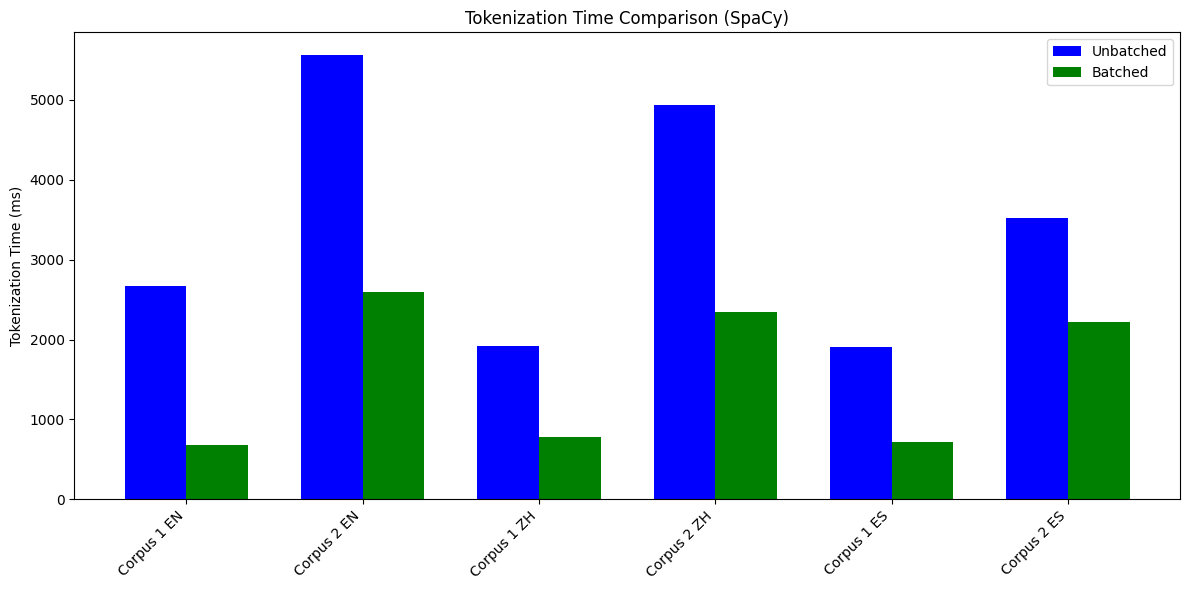

In [ ]:
import matplotlib.pyplot as plt

# Data from your output
corpora = ['Corpus 1 EN', 'Corpus 2 EN', 'Corpus 1 ZH', 'Corpus 2 ZH', 'Corpus 1 ES', 'Corpus 2 ES']
unbatched_times = [
    unbatched_tokenize_results_EN1["SpaCy"]["Tokenization Time "],
    unbatched_tokenize_results_EN2["SpaCy"]["Tokenization Time "],
    unbatched_tokenize_results_ZH1["SpaCy"]["Tokenization Time "],
    unbatched_tokenize_results_ZH2["SpaCy"]["Tokenization Time "],
    unbatched_tokenize_results_ES1["SpaCy"]["Tokenization Time "],
    unbatched_tokenize_results_ES2["SpaCy"]["Tokenization Time "]
]
batched_times = [
    batched_tokenize_time_EN1["SpaCy"]["Tokenization Time "],
    batched_tokenize_time_EN2["SpaCy"]["Tokenization Time "],
    batched_tokenize_time_ZH1["SpaCy"]["Tokenization Time "],
    batched_tokenize_time_ZH2["SpaCy"]["Tokenization Time "],
    batched_tokenize_time_ES1["SpaCy"]["Tokenization Time "],
    batched_tokenize_time_ES2["SpaCy"]["Tokenization Time "]
]

# Bar positions
x = range(len(corpora))

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width
width = 0.35

# Plot the unbatched times
ax.bar([i - width/2 for i in x], unbatched_times, width, label='Unbatched', color='b')

# Plot the batched times
ax.bar([i + width/2 for i in x], batched_times, width, label='Batched', color='g')

# Set the x-axis labels to the corpora names
ax.set_xticks(x)
ax.set_xticklabels(corpora, rotation=45, fontsize=10, ha='right')

# Set the y-axis label
ax.set_ylabel('Tokenization Time (ms)')

# Set the title
ax.set_title('Tokenization Time Comparison (SpaCy)')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
!pip install nltk
import nltk

# Download the punkt tokenizer (needed for NLTK)
nltk.download('punkt')

from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

# Reference (original English) and Candidate (detokenized English) sentences
reference = [['this', 'is', 'a', 'test', 'sentence']]
candidate = ['this', 'is', 'a', 'test', 'sentence']

# Calculate BLEU score for a single sentence
bleu_score = sentence_bleu(reference, candidate)
print(f"BLEU Score: {bleu_score}")

# If you have multiple sentences, you can calculate the corpus-level BLEU score
corpus_bleu_score = corpus_bleu([reference], [candidate])
print(f"Corpus BLEU Score: {corpus_bleu_score}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


BLEU Score: 1.0
Corpus BLEU Score: 1.0
